OBJECTIVE:

The primary goal of this project is to predict the median housing prices in California based on socio-economic and geographical data using advanced machine learning models. The dataset provides insights into various factors influencing housing prices, and the analysis aims to offer actionable predictions and insights for potential stakeholders.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing California Housing Prices Dataset

from pathlib import Path


housing = pd.read_csv(Path("/content/drive/MyDrive/mldata/housing.csv"))


In [ ]:
housing

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

                                                            Data Preprocessing

In [ ]:
df=housing.copy()

In [ ]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

total_bedrooms contains 207 missing value we have to impute them before training machine learning model

In [ ]:
housing.describe()


longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [ ]:
sns.pairplot(housing)
plt.show()

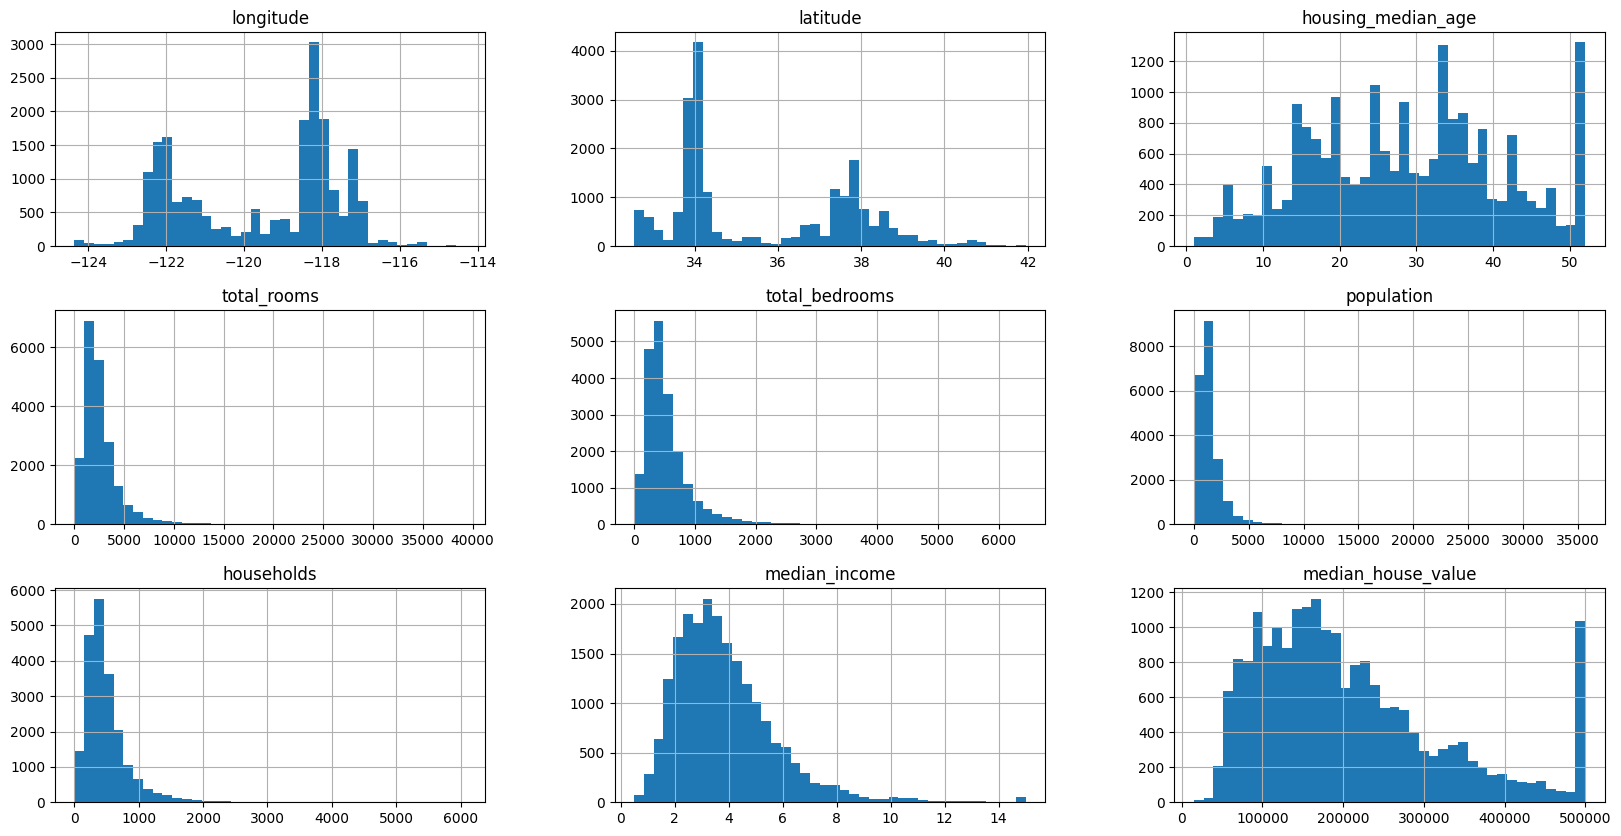

In [ ]:

%matplotlib inline
housing.hist(bins=40,figsize=(20,10))
plt.show()

total_rooms,total_bedrooms and household are right tailed data to make them normal distributed we can apply  natural log transformation or log base 10 transformation on them

median_house_age has almost normal distribution and normal_house_value is little bit right tailed where we can apply natural log to make it normal distributed

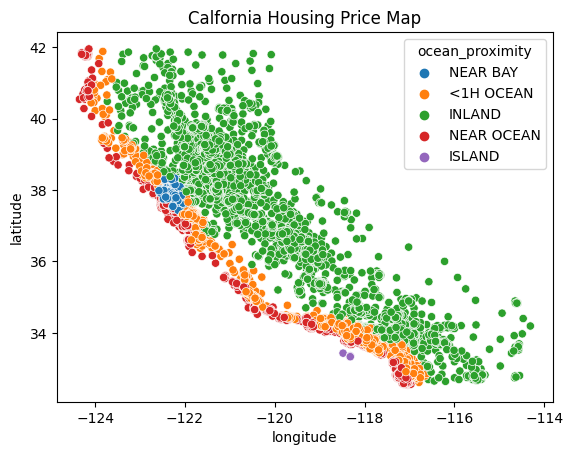

In [ ]:
# let's see how actual calfornia dataset looks like
sns.scatterplot(x=housing.longitude,y=housing.latitude,hue=housing['ocean_proximity'])
plt.title('Calfornia Housing Price Map')
plt.show()

In [ ]:
# checking the correlation between different features
corr=housing.drop(columns=['ocean_proximity']).corr()
corr

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_median_age       -0.320451   -0.296244   -0.302916      -0.119034   
total_rooms               0.930380    0.857126    0.918484       0.198050   
total_bedrooms            1.000000    0.877747    0.979728      -0.007723   
population                0.877747    1.000000    0.907222       0.004834   
households                0.979728    0.907222    1.000000       0.013033   
median_income            -0.007723    0.004834    0.013033       1.000000   
median_house_value        0.049686   -0.024650    0.065843       0.688075   

                    median_house_value  
longitude                    -0.045967  
latitude                     -0.144160  
housing_median_age            0.105623  
total_rooms                   0.134153  
total_bedrooms                0.049686  
population                   -0.024650  
households                    0.065843  
median_income                 0.688075  
median_house_value            1.000000

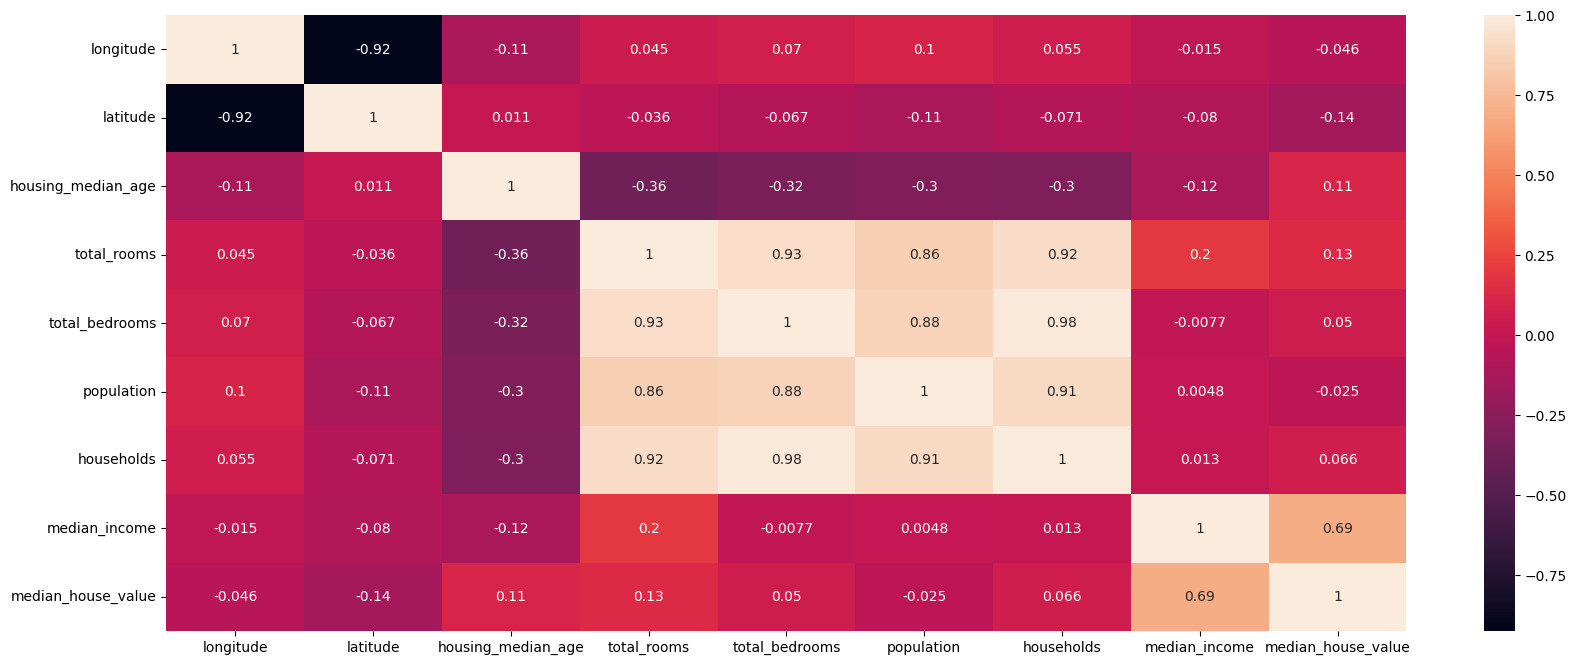

In [ ]:
plt.figure(figsize=(20,8))
sns.heatmap(corr,annot=True)
plt.show()

From above visualization we can conclude that some features are heighly correlated with each other which cause multicollinarity and as we know some machine learning algorithms doesn't work well with multicollinarity.

In [ ]:
# To get rid of multicollinearity we try some new features in our dataset

housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]


In [ ]:
corr1=housing.drop(columns=['ocean_proximity']).corr()
corr1

longitude  latitude  housing_median_age  \
longitude                  1.000000 -0.924664           -0.108197   
latitude                  -0.924664  1.000000            0.011173   
housing_median_age        -0.108197  0.011173            1.000000   
total_rooms                0.044568 -0.036100           -0.361262   
total_bedrooms             0.069608 -0.066983           -0.320451   
population                 0.099773 -0.108785           -0.296244   
households                 0.055310 -0.071035           -0.302916   
median_income             -0.015176 -0.079809           -0.119034   
median_house_value        -0.045967 -0.144160            0.105623   
rooms_per_household       -0.027540  0.106389           -0.153277   
bedrooms_per_room          0.092657 -0.113815            0.136089   
population_per_household   0.002476  0.002366            0.013191   

                          total_rooms  total_bedrooms  population  households  \
longitude                    0.044568        0.069608    0.099773    0.055310   
latitude                    -0.036100       -0.066983   -0.108785   -0.071035   
housing_median_age          -0.361262       -0.320451   -0.296244   -0.302916   
total_rooms                  1.000000        0.930380    0.857126    0.918484   
total_bedrooms               0.930380        1.000000    0.877747    0.979728   
population                   0.857126        0.877747    1.000000    0.907222   
households                   0.918484        0.979728    0.907222    1.000000   
median_income                0.198050       -0.007723    0.004834    0.013033   
median_house_value           0.134153        0.049686   -0.024650    0.065843   
rooms_per_household          0.133798        0.001538   -0.072213   -0.080598   
bedrooms_per_room           -0.187900        0.084238    0.035319    0.065087   
population_per_household    -0.024581       -0.028355    0.069863   -0.027309   

                          median_income  median_house_value  \
longitude                     -0.015176           -0.045967   
latitude                      -0.079809           -0.144160   
housing_median_age            -0.119034            0.105623   
total_rooms                    0.198050            0.134153   
total_bedrooms                -0.007723            0.049686   
population                     0.004834           -0.024650   
households                     0.013033            0.065843   
median_income                  1.000000            0.688075   
median_house_value             0.688075            1.000000   
rooms_per_household            0.326895            0.151948   
bedrooms_per_room             -0.615661           -0.255880   
population_per_household       0.018766           -0.023737   

                          rooms_per_household  bedrooms_per_room  \
longitude                           -0.027540           0.092657   
latitude                             0.106389          -0.113815   
housing_median_age                  -0.153277           0.136089   
total_rooms                          0.133798          -0.187900   
total_bedrooms                       0.001538           0.084238   
population                          -0.072213           0.035319   
households                          -0.080598           0.065087   
median_income                        0.326895          -0.615661   
median_house_value                   0.151948          -0.255880   
rooms_per_household                  1.000000          -0.416952   
bedrooms_per_room                   -0.416952           1.000000   
population_per_household            -0.004852           0.002938   

                          population_per_household  
longitude                                 0.002476  
latitude                                  0.002366  
housing_median_age                        0.013191  
total_rooms                              -0.024581  
total_bedrooms                           -0.028355  
population                                0.069863 

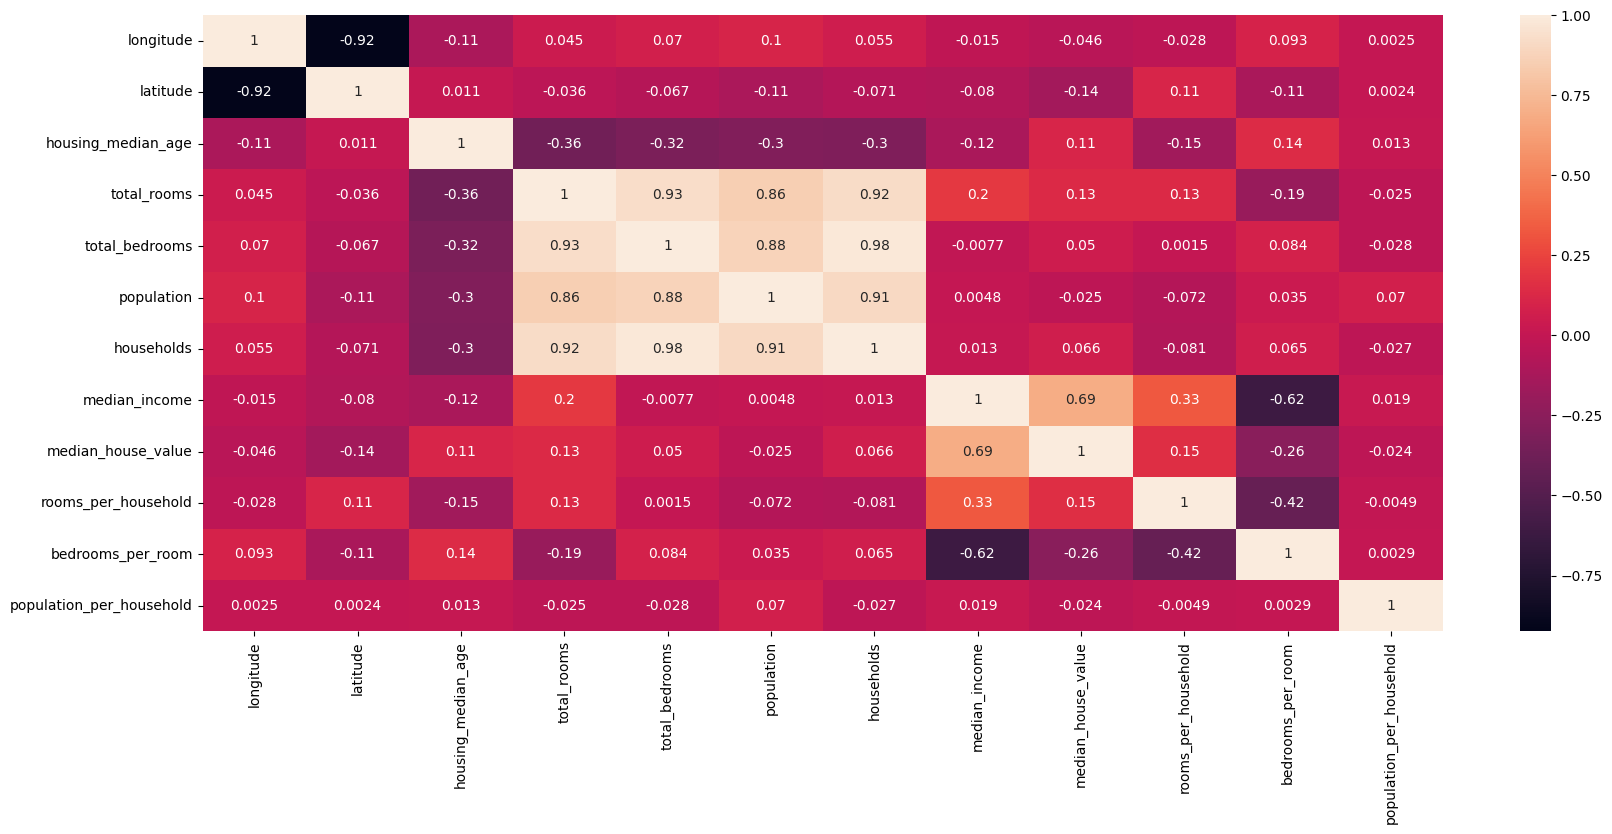

In [ ]:
plt.figure(figsize=(20,8))
sns.heatmap(corr1,annot=True)
plt.show()

Now we can drop these columns from housing and Let's go to next step where we make our dataset fully ready to feed into machine learning algorithm

In [ ]:
housing.drop(columns=['total_rooms','total_bedrooms','population','households'],inplace=True)

In [ ]:
housing.head()

longitude  latitude  housing_median_age  median_income  median_house_value  \
0    -122.23     37.88                41.0         8.3252            452600.0   
1    -122.22     37.86                21.0         8.3014            358500.0   
2    -122.24     37.85                52.0         7.2574            352100.0   
3    -122.25     37.85                52.0         5.6431            341300.0   
4    -122.25     37.85                52.0         3.8462            342200.0   

  ocean_proximity  rooms_per_household  bedrooms_per_room  \
0        NEAR BAY             6.984127           0.146591   
1        NEAR BAY             6.238137           0.155797   
2        NEAR BAY             8.288136           0.129516   
3        NEAR BAY             5.817352           0.184458   
4        NEAR BAY             6.281853           0.172096   

   population_per_household  
0                  2.555556  
1                  2.109842  
2                  2.802260  
3                  2.547945  
4                  2.181467

In [ ]:
housing[housing['median_house_value']>=500000]

longitude  latitude  housing_median_age  median_income  \
89       -122.27     37.80                52.0         1.2434   
459      -122.25     37.87                52.0         1.1696   
493      -122.24     37.86                52.0         7.8521   
494      -122.24     37.85                52.0         9.3959   
509      -122.23     37.83                52.0         7.8772   
...          ...       ...                 ...            ...   
20422    -118.90     34.14                35.0         5.1457   
20426    -118.69     34.18                11.0        10.0472   
20427    -118.80     34.19                 4.0         8.6499   
20436    -118.69     34.21                10.0        12.5420   
20443    -118.85     34.27                50.0         3.3438   

       median_house_value ocean_proximity  rooms_per_household  \
89               500001.0        NEAR BAY             2.929412   
459              500001.0        NEAR BAY             2.436000   
493              500001.0        NEAR BAY             7.794393   
494              500001.0        NEAR BAY             7.512097   
509              500001.0        NEAR BAY             8.282548   
...                   ...             ...                  ...   
20422            500001.0       <1H OCEAN             6.958333   
20426            500001.0       <1H OCEAN             9.890756   
20427            500001.0       <1H OCEAN             7.236059   
20436            500001.0       <1H OCEAN             9.873315   
20443            500001.0       <1H OCEAN             5.342857   

       bedrooms_per_room  population_per_household  
89              0.313253                  4.658824  
459             0.387521                  5.396000  
493             0.134892                  2.415888  
494             0.127214                  2.754032  
509             0.126756                  2.623269  
...                  ...                       ...  
20422           0.174983                  2.666667  
20426           0.117247                  3.487395  
20427           0.142692                  2.553439  
20436           0.111657                  3.177898  
20443           0.176471                  3.714286  

[992 rows x 9 columns]

Capped values: 965 out of 20640 (4.68%)


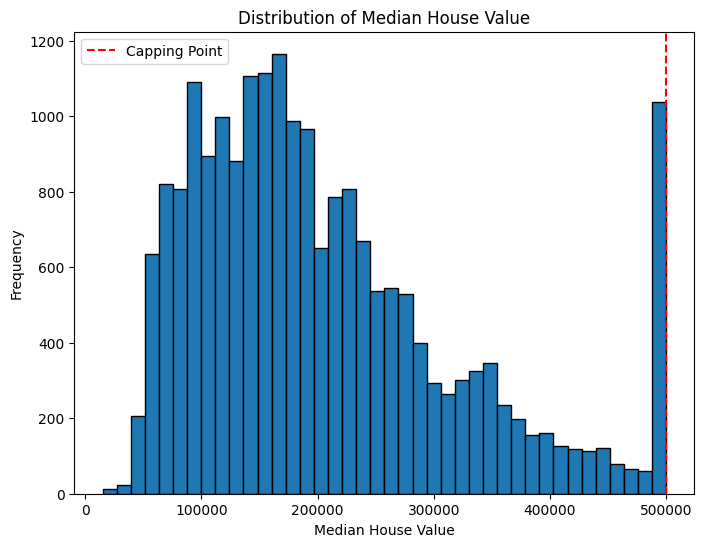

In [ ]:

capped_values = housing[housing['median_house_value'] >= 500001]
print(f"Capped values: {len(capped_values)} out of {len(housing)} ({len(capped_values)/len(housing)*100:.2f}%)")


plt.figure(figsize=(8, 6))
plt.hist(housing['median_house_value'], bins=40, edgecolor='black')
plt.axvline(x=500001, color='r', linestyle='--', label='Capping Point')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.title('Distribution of Median House Value')
plt.legend()
plt.show()


In [ ]:
housing.shape


(20640, 9)

In [ ]:
housing=housing.sample(20640)
housing=housing.sample(20640)
housing=housing.sample(20640)
housing=housing.sample(20640)

# If you are curious to know why i do this let me explain, I do this to make data more random so during train test spilt data spreed properly into x_train,x_test

In [ ]:
housing

longitude  latitude  housing_median_age  median_income  \
14541    -117.15     32.92                16.0         4.9024   
2954     -119.01     35.35                39.0         1.9125   
4080     -118.37     34.15                23.0         3.1373   
5103     -118.30     33.95                50.0         3.1346   
624      -122.18     37.71                45.0         3.3750   
...          ...       ...                 ...            ...   
5644     -118.29     33.75                27.0         2.5795   
800      -122.07     37.63                27.0         2.4808   
15775    -122.45     37.77                52.0         3.5750   
6250     -117.98     34.04                34.0         3.4722   
9245     -120.05     36.97                20.0         1.8444   

       median_house_value ocean_proximity  rooms_per_household  \
14541            182900.0       <1H OCEAN             5.813268   
2954              57900.0          INLAND             4.530303   
4080             263100.0       <1H OCEAN             3.752241   
5103             120000.0       <1H OCEAN             5.869427   
624              157500.0        NEAR BAY             5.377778   
...                   ...             ...                  ...   
5644             192400.0      NEAR OCEAN             4.274611   
800              157600.0        NEAR BAY             4.017316   
15775            500001.0        NEAR BAY             4.843505   
6250             154600.0       <1H OCEAN             5.114458   
9245              47100.0          INLAND             5.059850   

       bedrooms_per_room  population_per_household  
14541           0.165680                  3.641278  
2954            0.249164                  2.772727  
4080            0.286490                  1.948655  
5103            0.176886                  2.840764  
624             0.202479                  3.844444  
...                  ...                       ...  
5644            0.268485                  3.520725  
800             0.259698                  2.926407  
15775           0.220355                  1.985915  
6250            0.210836                  4.232932  
9245            0.210448                  2.451372  

[20640 rows x 9 columns]

In [ ]:
housing.describe()

longitude      latitude  housing_median_age  median_income  \
count  20640.000000  20640.000000        20640.000000   20640.000000   
mean    -119.569704     35.631861           28.639486       3.870671   
std        2.003532      2.135952           12.585558       1.899822   
min     -124.350000     32.540000            1.000000       0.499900   
25%     -121.800000     33.930000           18.000000       2.563400   
50%     -118.490000     34.260000           29.000000       3.534800   
75%     -118.010000     37.710000           37.000000       4.743250   
max     -114.310000     41.950000           52.000000      15.000100   

       median_house_value  rooms_per_household  bedrooms_per_room  \
count        20640.000000         20640.000000       20433.000000   
mean        206855.816909             5.429000           0.213039   
std         115395.615874             2.474173           0.057983   
min          14999.000000             0.846154           0.100000   
25%         119600.000000             4.440716           0.175427   
50%         179700.000000             5.229129           0.203162   
75%         264725.000000             6.052381           0.239821   
max         500001.000000           141.909091           1.000000   

       population_per_household  
count              20640.000000  
mean                   3.070655  
std                   10.386050  
min                    0.692308  
25%                    2.429741  
50%                    2.818116  
75%                    3.282261  
max                 1243.333333

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.pipeline import FeatureUnion

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(housing.drop(columns=['median_house_value']),housing['median_house_value'],test_size=0.20,random_state=42)

In [ ]:
x_train.head()

longitude  latitude  housing_median_age  median_income ocean_proximity  \
10681    -117.76     33.53                18.0         8.4614       <1H OCEAN   
2385     -119.40     36.59                37.0         3.5074          INLAND   
10810    -117.93     33.64                24.0         2.5301       <1H OCEAN   
4472     -118.18     34.08                31.0         2.9939       <1H OCEAN   
13379    -117.61     34.14                14.0         5.5198          INLAND   

       rooms_per_household  bedrooms_per_room  population_per_household  
10681             5.558621           0.174007                  2.258621  
2385              5.124138           0.199192                  3.368966  
10810             3.452970           0.283871                  3.658416  
4472              4.560554           0.235964                  4.027682  
13379             6.559751           0.157189                  3.055187

In [ ]:
x_test.head()

longitude  latitude  housing_median_age  median_income ocean_proximity  \
5323     -122.69     38.34                12.0         4.0844       <1H OCEAN   
1730     -117.77     33.53                32.0         5.1837       <1H OCEAN   
9397     -118.09     34.74                34.0         2.4348          INLAND   
7352     -120.44     34.94                29.0         1.6875       <1H OCEAN   
12778    -117.87     33.74                31.0         2.6734       <1H OCEAN   

       rooms_per_household  bedrooms_per_room  population_per_household  
5323              5.073298           0.201754                  2.808901  
1730              5.738490           0.212131                  2.034991  
9397              4.911290           0.233990                  3.213710  
7352              3.815041           0.274907                  3.321138  
12778             3.705230           0.278871                  5.212361

In [ ]:
x_test['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     1845
INLAND        1308
NEAR OCEAN     532
NEAR BAY       441
ISLAND           2
Name: count, dtype: int64

In [ ]:
num_attribute=list(housing.drop(columns=['ocean_proximity','median_house_value']))

In [ ]:
num_attribute

['longitude',
 'latitude',
 'housing_median_age',
 'median_income',
 'rooms_per_household',
 'bedrooms_per_room',
 'population_per_household']

In [ ]:
cat_attribute=['ocean_proximity']


In [ ]:

pipeline1=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('Scaler',StandardScaler())

],verbose=True)

In [ ]:

pipeline2=Pipeline(steps=[
    ('Label Encoder',OneHotEncoder(sparse_output=False,drop='first',handle_unknown='ignore'))
])

In [ ]:
preprocessor=ColumnTransformer(transformers=[
    ('Pipeline 1 For Numerical Columns ',pipeline1,num_attribute),
    ('Encoder For Cateogrical Columns',pipeline2,cat_attribute)
])

In [ ]:
preprocessor

ColumnTransformer(transformers=[('Pipeline 1 For Numerical Columns ',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('Scaler', StandardScaler())],
                                          verbose=True),
                                 ['longitude', 'latitude', 'housing_median_age',
                                  'median_income', 'rooms_per_household',
                                  'bedrooms_per_room',
                                  'population_per_household']),
                                ('Encoder For Cateogrical Columns',
                                 Pipeline(steps=[('Label Encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['ocean_proximity'])])

In [ ]:
x_train.shape

(16512, 8)

In [ ]:
x_train_transformed=preprocessor.fit_transform(x_train)

[Pipeline] ........... (step 1 of 2) Processing imputer, total=   0.0s
[Pipeline] ............ (step 2 of 2) Processing Scaler, total=   0.0s


In [ ]:
x_train_transformed.shape

(16512, 11)

In [ ]:
x_test.shape

(4128, 8)

In [ ]:
x_test_transformed=preprocessor.fit_transform(x_test)

[Pipeline] ........... (step 1 of 2) Processing imputer, total=   0.0s
[Pipeline] ............ (step 2 of 2) Processing Scaler, total=   0.0s


In [ ]:
x_test_transformed.shape

(4128, 11)

In [ ]:
x_test['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     1845
INLAND        1308
NEAR OCEAN     532
NEAR BAY       441
ISLAND           2
Name: count, dtype: int64

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error,mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, explained_variance_score





                                                    First Model as Linear Regression



In [ ]:
lr=LinearRegression()
lr.fit(x_train_transformed,y_train)

LinearRegression()

In [ ]:
y_pred_lr=lr.predict(x_test_transformed)

In [ ]:
print('Percentage Error',mean_absolute_percentage_error(y_test,y_pred_lr))
print('Mean Square Error',mean_squared_error(y_test,y_pred_lr))
#print('RMSE',root_mean_squared_error(y_test,y_pred_lr))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred_lr)))
print('R2 Score',r2_score(y_test,y_pred_lr))
print('Variance Score',explained_variance_score(y_test,y_pred_lr))


Percentage Error 0.2992702594923461
Mean Square Error 5182776766.807929
RMSE 71991.50482388827
R2 Score 0.6186994193025623
Variance Score 0.6187864908400217


In [ ]:
cv_score_lr=cross_val_score(lr,x_train_transformed,y_train,cv=10,scoring='neg_mean_squared_error')


In [ ]:
rmse_lr=np.sqrt(-cv_score_lr)
print('CV Scores',rmse_lr)
print('RMSE',rmse_lr.mean())

CV Scores [ 72133.68574903  71786.27297985 220025.0771258   69370.45941046
  74111.45865991  68939.78867757  70432.2268841   67504.186489
  70095.88007227  69054.78522638]
RMSE 85345.38212743813


Conclusion : LinearRegression Model doesn't perform well it goes Underfitting and it fail to learn the pattern cause it give us 27% of mean_absolute_percentage_error and RMSE as 70804 after doing 10 Cross validation and its r2 score is 0.63.


                                          Second Model as RandomForestRegressor
                                          

In [ ]:
rfr=RandomForestRegressor(n_estimators=100,max_features=8)

In [ ]:
rfr.fit(x_train_transformed,y_train)

RandomForestRegressor(max_features=8)

In [ ]:
y_pred_rfr=rfr.predict(x_test_transformed)

In [ ]:
print('Percentage Error',mean_absolute_percentage_error(y_test,y_pred_rfr))
print('Mean Square Error',mean_squared_error(y_test,y_pred_rfr))
#print('RMSE',root_mean_squared_error(y_test,y_pred_rfr))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred_lr)))
print('R2 Score',r2_score(y_test,y_pred_rfr))
print('Variance Score',explained_variance_score(y_test,y_pred_rfr))


Percentage Error 0.21554089087343078
Mean Square Error 3621208775.6304584
RMSE 71991.50482388827
R2 Score 0.733585089402767
Variance Score 0.7347648981967634


In [ ]:
# This line of Code take some time to run

cv_score_rfr=cross_val_score(rfr,x_train_transformed,y_train,cv=10,scoring='neg_mean_squared_error')


In [ ]:
rmse_rfr=np.sqrt(-cv_score_rfr)
print('CV Scores',rmse_rfr)
print('RMSE',rmse_rfr.mean())

CV Scores [51437.35197217 50005.50120527 48911.01210491 45075.29863807
 49401.25340712 47039.51622159 48619.18097717 47580.67103873
 47020.27870878 47998.28343493]
RMSE 48308.83477087503


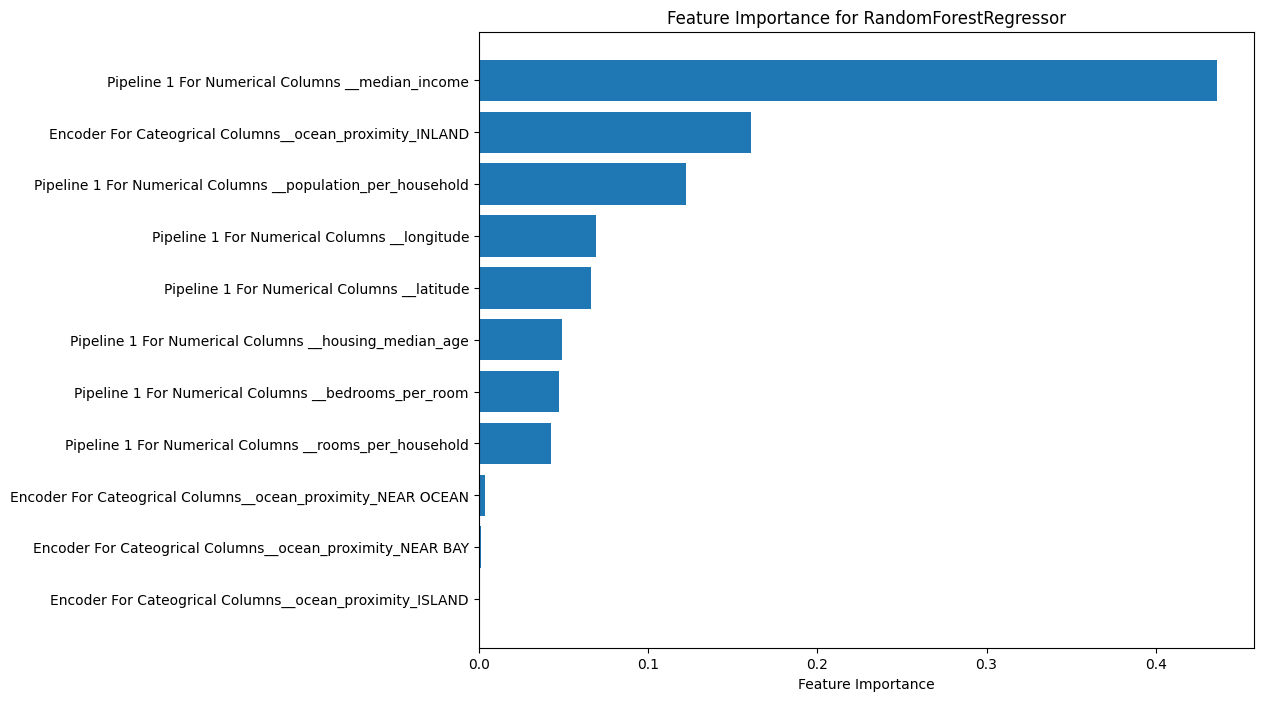

In [ ]:
importances = rfr.feature_importances_
feature_names = preprocessor.get_feature_names_out()
sorted_indices = importances.argsort()

plt.figure(figsize=(10, 8))
plt.barh(feature_names[sorted_indices], importances[sorted_indices])
plt.xlabel('Feature Importance')
plt.title('Feature Importance for RandomForestRegressor')
plt.show()


Random forest Regressor perform well than Linear regression and it give us RMSE of 48094 which is less than of Linear regression.we confirm it by doing cross validation and well R2 score is 0.81 but explained_variance_score is 0.81

After doing Cross validation we can confirm that RandomForesetRegressor perform better than Linear regressor

                                                 Thrid Model as SVM

In [ ]:

svr=SVR(kernel='linear')

In [ ]:
svr.fit(x_train_transformed,y_train)

SVR(kernel='linear')

In [ ]:
y_pred_svr=svr.predict(x_test_transformed)

In [ ]:
print('Percentage Error',mean_absolute_percentage_error(y_test,y_pred_svr))
print('Mean Square Error',mean_squared_error(y_test,y_pred_svr))
#print('RMSE',root_mean_squared_error(y_test,y_pred_svr))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred_svr)))

print('R2 Score',r2_score(y_test,y_pred_svr))
print('Variance Score',explained_variance_score(y_test,y_pred_svr))


Percentage Error 0.48615460919745446
Mean Square Error 12645529658.733816
RMSE 112452.34394504108
R2 Score 0.06965937005394374
Variance Score 0.12437001674046955


SVM perfrom more worst than Linear Regressor

In [ ]:
# Import necessary libraries
import anvil.server

# Connect to your Anvil app (replace with your app's Uplink key)
anvil.server.connect("server_4NINEPK6AH3ZEAJV553SJSDV-F5PBTRZXU7VHHVL2")

# Assuming `preprocessor` and `rfr` are already defined and trained in your script

# Function to handle preprocessing and prediction
@anvil.server.callable
def predict_house_price(input_data):
    """
    Receives input data from Anvil app, preprocesses it, and predicts the house price.

    Parameters:
    input_data (dict): Dictionary containing feature values:
        {
            'longitude': float,
            'latitude': float,
            'housing_median_age': float,
            'median_income': float,
            'rooms_per_household': float,
            'bedrooms_per_room': float,
            'population_per_household': float,
            'ocean_proximity': str
        }

    Returns:
    float: Predicted median house value
    """
    try:
        # Create a DataFrame from the input dictionary
        input_df = pd.DataFrame([input_data])

        # Preprocess the input data
        preprocessed_data = preprocessor.transform(input_df)

        # Predict using the Random Forest model
        prediction = rfr.predict(preprocessed_data)

        # Return the prediction as a float
        return float(prediction[0])
    except Exception as e:
        return f"Error: {str(e)}"




Disconnecting from previous connection first...
Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default Environment" as SERVER


In [ ]:
# Install Anvil Uplink
!pip install anvil-uplink

In [ ]:
anvil.server.wait_forever()
